In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CL_Nagar_NE_path = '/Users/noravivancogonzalez/code/wcEcoli/out/pdr_CLMLNE_protease_assignment/kb_plot_out/protein_half_lives.tsv'
CLNE_path = '/Users/noravivancogonzalez/code/wcEcoli/out/pdr_CLNE_protease_assignment/kb_plot_out/protein_half_lives.tsv'
CL_Gupta_NE_path = '/Users/noravivancogonzalez/code/wcEcoli/out/pdr_CLClim3aNE_protease_assignment/kb_plot_out/protein_half_lives.tsv'

In [3]:
CL_Nagar_NE_half_lives = pd.read_csv(CL_Nagar_NE_path,sep='\t')
CLNE_half_lives = pd.read_csv(CLNE_path,sep='\t')
CL_Gupta_NE_half_lives = pd.read_csv(CL_Gupta_NE_path,sep='\t')

In [4]:
CL_Gupta_NE_half_lives['Parca'] = 'CL_Gupta_NE'
CL_Nagar_NE_half_lives['Parca'] = 'CL_Nagar_NE'
CLNE_half_lives['Parca'] = 'CLNE'
master_comp_pd = pd.concat([CL_Gupta_NE_half_lives, CL_Nagar_NE_half_lives, CLNE_half_lives])

In [36]:
master_comp_pd.head(5)

,monomer_id,degradation_rate(1/s),half_life_(min),degradation_rate_source,Parca
0,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER,0.000023,501.707893,Gupta_et_al_MS_2024,CL_Gupta_NE
1,1-PFK-MONOMER,0.000015,766.256894,Gupta_et_al_MS_2024,CL_Gupta_NE
2,2-DEHYDROPANTOATE-REDUCT-MONOMER,0.000019,600.000000,N_end_rule,CL_Gupta_NE
3,2-ISOPROPYLMALATESYN-MONOMER,0.000042,276.924332,Gupta_et_al_MS_2024,CL_Gupta_NE
4,2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER,0.000023,493.397050,Gupta_et_al_MS_2024,CL_Gupta_NE


In [39]:
master_comp_pd[(master_comp_pd['Parca'] == 'CLNE') & (master_comp_pd['degradation_rate_source'] == 'N_end_rule')].groupby('half_life_(min)').count()

,monomer_id,degradation_rate(1/s),degradation_rate_source,Parca
half_life_(min),,,,
2.0,7,7,7,7
600.0,4295,4295,4295,4295
6000.0,1,1,1,1


In [23]:
# Define the desired order of the legend and their new names
label_mapping = {
    'Gupta_et_al_MS_2024': 'Gupta et al. Mass Spec',
    'Nagar_et_al_ML_2021': 'Nagar et al. Mass Spec',
    'N_end_rule': 'N-end rule',
    'CL_measured_deg_rates_2020': 'Covert lab experimental values'
}

In [75]:
palette = {'Gupta_et_al_MS_2024': '#A7226E', 
           'N_end_rule': '#EC2049',
           'Nagar_et_al_ML_2021': '#2F9599',
           'CL_measured_deg_rates_2020': '#F26B38'}

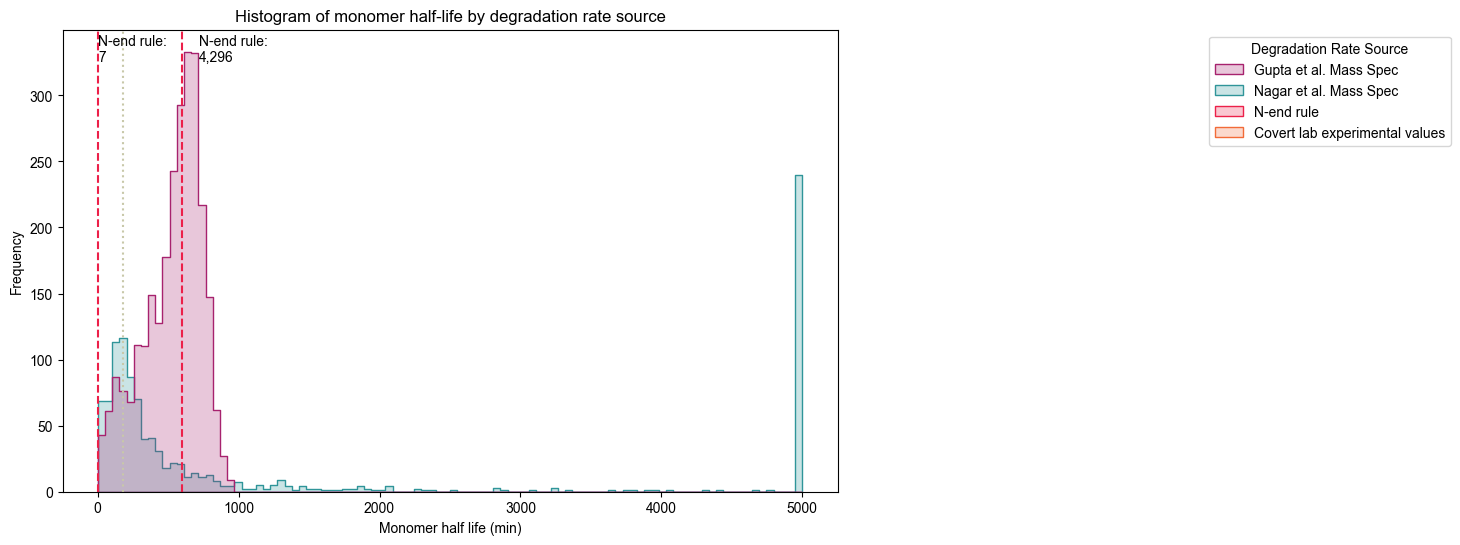

In [78]:
plt.figure(figsize=(10, 6)) 
g=sns.histplot(data = master_comp_pd[
               (master_comp_pd['Parca'] != 'CLNE') 
               & (master_comp_pd['degradation_rate_source'] != 'N_end_rule')
               & (master_comp_pd['degradation_rate_source'] != 'CL_measured_deg_rates_2020')
               & (master_comp_pd['half_life_(min)'] <=6000)
               ], 
               x = 'half_life_(min)',
               hue = 'degradation_rate_source', palette = palette,
               element = 'step',
               hue_order=hue_order_list)

# Add the vertical lines
plt.axvline(x=2, color='#EC2049', linestyle='--', linewidth=1.5)
plt.axvline(x=600, color='#EC2049', linestyle='--', linewidth=1.5)
plt.axvline(x=180, color='#C8C8A9', linestyle=':', linewidth=1.5)


# Add the label at the top of the line
plt.text(2*1.2, plt.ylim()[1]*.99, 'N-end rule:\n7',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)
plt.text(600*1.2, plt.ylim()[1]*.99, 'N-end rule:\n4,296',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)

plt.xlabel('Monomer half life (min)')
plt.ylabel('Frequency')
plt.title('Histogram of monomer half-life by degradation rate source')

# Get the legend object
legend = g.get_legend()
legend_labels = legend.get_texts()

    # Update the text labels with the new names
for text in legend_labels:
    old_label = text.get_text()
    text.set_text(label_mapping.get(old_label, old_label))


legend.set(bbox_to_anchor=(1.8, 1), title = 'Degradation Rate Source')

plt.show()


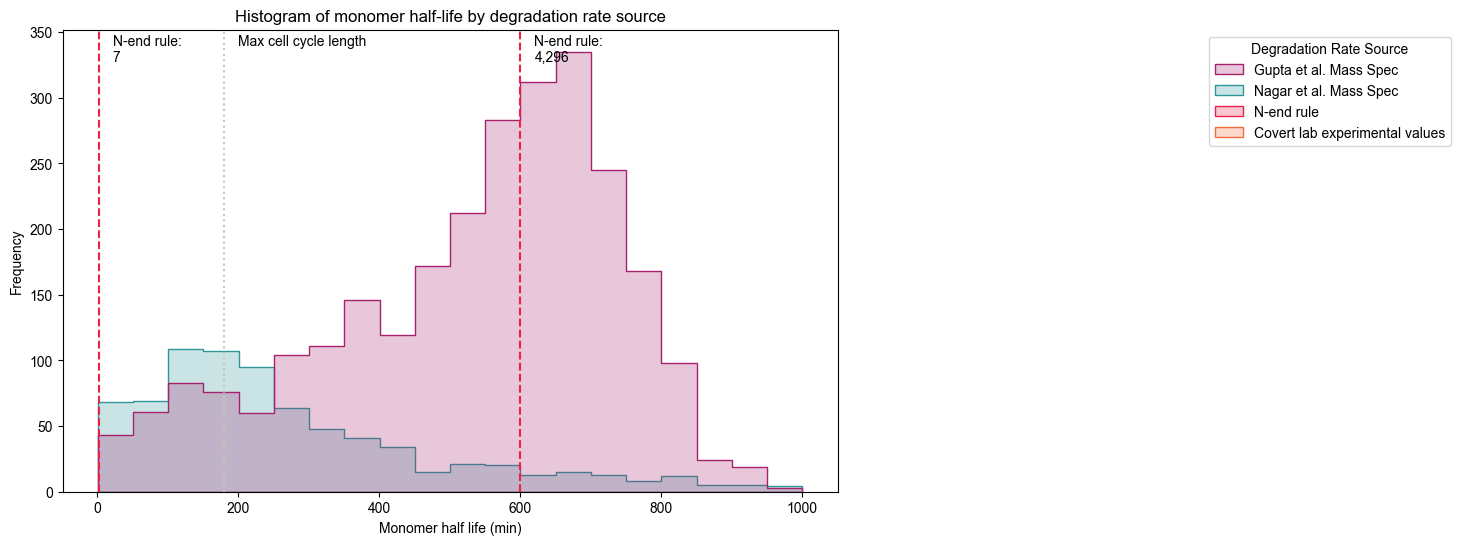

In [80]:
plt.figure(figsize=(10, 6)) 
g=sns.histplot(data = master_comp_pd[
               (master_comp_pd['Parca'] != 'CLNE') 
               & (master_comp_pd['degradation_rate_source'] != 'N_end_rule')
               & (master_comp_pd['degradation_rate_source'] != 'CL_measured_deg_rates_2020')
               & (master_comp_pd['half_life_(min)'] <=1000)
               ], 
               x = 'half_life_(min)',
               hue = 'degradation_rate_source', palette= palette,
               element = 'step',
               hue_order=hue_order_list)

# Add the vertical lines
plt.axvline(x=2, color='#EC2049', linestyle='--', linewidth=1.5)
plt.axvline(x=600, color='#EC2049', linestyle='--', linewidth=1.5)
plt.axvline(x=180, color='#C8C8A9', linestyle=':', linewidth=1.5)


# Add the label at the top of the line
plt.text(2+20, plt.ylim()[1]*.99, 'N-end rule:\n7',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)
plt.text(180+20, plt.ylim()[1]*.99, 'Max cell cycle length',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)
plt.text(600+20, plt.ylim()[1]*.99, 'N-end rule:\n4,296',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)

plt.xlabel('Monomer half life (min)')
plt.ylabel('Frequency')
plt.title('Histogram of monomer half-life by degradation rate source')

# Get the legend object
legend = g.get_legend()
legend_labels = legend.get_texts()

    # Update the text labels with the new names
for text in legend_labels:
    old_label = text.get_text()
    text.set_text(label_mapping.get(old_label, old_label))


legend.set(bbox_to_anchor=(1.8, 1), title = 'Degradation Rate Source')

plt.show()


In [67]:
source_counts = master_comp_pd.groupby(['Parca', 'degradation_rate_source']).count()

In [69]:
source_counts.reset_index(inplace = True)

In [70]:
source_counts

,Parca,degradation_rate_source,monomer_id,degradation_rate(1/s),half_life_(min)
0,CLNE,CL_measured_deg_rates_2020,7,7,7
1,CLNE,N_end_rule,4303,4303,4303
2,CL_Gupta_NE,CL_measured_deg_rates_2020,7,7,7
3,CL_Gupta_NE,Gupta_et_al_MS_2024,2675,2675,2675
4,CL_Gupta_NE,N_end_rule,1628,1628,1628
5,CL_Nagar_NE,CL_measured_deg_rates_2020,7,7,7
6,CL_Nagar_NE,N_end_rule,3212,3212,3212
7,CL_Nagar_NE,Nagar_et_al_ML_2021,1091,1091,1091


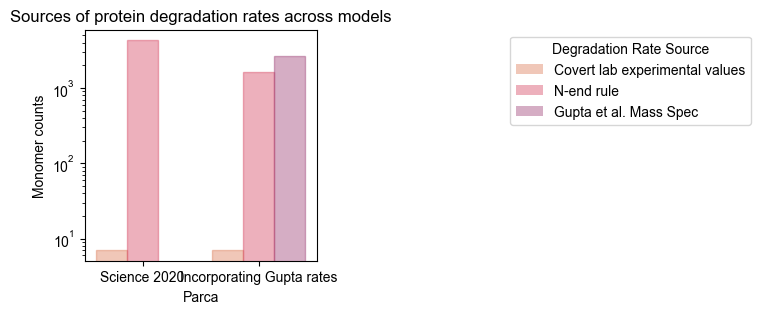

In [90]:
plt.figure(figsize=(3, 3)) 
g = sns.barplot(x='Parca', y='monomer_id', order = ['CLNE', 'CL_Gupta_NE'],
                hue='degradation_rate_source', data=source_counts, 
                hue_order = ['CL_measured_deg_rates_2020','N_end_rule','Gupta_et_al_MS_2024'], palette = palette, alpha=0.4)
g.set(yscale="log")

g.set_ylabel('Monomer counts');
g.set_xticks(np.arange(len(['Science 2020', 'Incorporating Gupta rates'])))
g.set_xticklabels(['Science 2020', 'Incorporating Gupta rates'])

g.set_title('Sources of protein degradation rates across models');


# Iterate through the bars (patches) and set the edgecolor
for i, bar in enumerate(g.patches):
    # Determine the color based on the hue group
    hue_label = bar.get_facecolor()  # Get the facecolor assigned by the palette

    # Set the edgecolor to the facecolor
    bar.set_edgecolor(hue_label)
# Get the legend object
legend = g.get_legend()
legend_labels = legend.get_texts()

    # Update the text labels with the new names
for text in legend_labels:
    old_label = text.get_text()
    text.set_text(label_mapping.get(old_label, old_label))


legend.set(bbox_to_anchor=(1.8, 1), title = 'Degradation Rate Source')

plt.show()

In [92]:
import ast
path_gene_monomer = '/Users/noravivancogonzalez/code/wcEcoli/reconstruction/ecoli/flat/rnas.tsv'
gene_monomer_pd= pd.read_csv(path_gene_monomer,sep='\t', index_col= None, skiprows = [0,1,2,3], quotechar='"')
gene_monomer_dict = dict(zip(gene_monomer_pd['gene_id'], gene_monomer_pd['monomer_ids'].apply(lambda x: ast.literal_eval(x))))
monomer_gene_dict = {}
for key, value in gene_monomer_dict.items():
    if value:
        monomer_gene_dict[value[0]]=key

In [99]:
metal_monomer_path = '/Users/noravivancogonzalez/Documents/metal_protein_interaction_df.csv'
metal_monomer_pd = pd.read_csv(metal_monomer_path)
monomers_to_complexes_path = '/Users/noravivancogonzalez/code/wcEcoli/out/pdr_CLClim3aNE_protease_assignment/kb_plot_out/monomer_to_complex_table_monomer_to_complex_assignment.tsv'
# read in the table generated by analysis/parca/monomer_to_complex_table.py
monomers_to_complexes = pd.read_csv(monomers_to_complexes_path, sep='\t')

In [100]:
metal_associated_cplx = metal_monomer_pd[metal_monomer_pd[['FE', 'ZN', 'MN', 'CU', 'MO', 'NI', 'CO']].any(axis=1)]
metal_melted_df = pd.melt(metal_associated_cplx, id_vars = 'Protein ID', value_vars = ['FE', 'ZN', 'MN', 'CU', 'MO', 'NI', 'CO'], var_name='metal', value_name='metal ion counts')
metal_ion_mask = metal_melted_df['metal ion counts'] > 0
complexes_w_metal_df = metal_melted_df[metal_ion_mask]
complex_metal_dict = complexes_w_metal_df.groupby('Protein ID')['metal'].apply(list).to_dict()

In [101]:
monomers_to_complexes['monomer_id'] = monomers_to_complexes['monomer_id'].str[:-3]
monomers_to_complexes['complex_id'] = monomers_to_complexes['complex_id'].str[:-3]
monomer_complex_dict = monomers_to_complexes.groupby('monomer_id')['complex_id'].agg(list).to_dict()
master_comp_pd['complex_id'] = None
master_comp_pd['complex_id'] = master_comp_pd['monomer_id'].map(monomer_complex_dict)
master_comp_df_exploded = master_comp_pd.explode('complex_id')
master_comp_df_exploded['metal_cofactor'] = master_comp_df_exploded['complex_id'].map(complex_metal_dict)
wide_df = master_comp_df_exploded.pivot(index = ['monomer_id', 'complex_id'], columns = 'Parca', values = ['half_life_(min)', 'degradation_rate_source', 'metal_cofactor'])
wide_df.columns = ['_'.join(col).strip() for col in wide_df.columns.values] #Join with '_'

In [102]:
wide_df.head(5)

,,half_life_(min)_CLNE,half_life_(min)_CL_Gupta_NE,half_life_(min)_CL_Nagar_NE,degradation_rate_source_CLNE,degradation_rate_source_CL_Gupta_NE,degradation_rate_source_CL_Nagar_NE,metal_cofactor_CLNE,metal_cofactor_CL_Gupta_NE,metal_cofactor_CL_Nagar_NE
monomer_id,complex_id,,,,,,,,,
1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER,NaN,600.0,501.707893,600.0,N_end_rule,Gupta_et_al_MS_2024,N_end_rule,NaN,NaN,NaN
1-PFK-MONOMER,1-PFK,600.0,766.256894,600.0,N_end_rule,Gupta_et_al_MS_2024,N_end_rule,NaN,NaN,NaN
2-DEHYDROPANTOATE-REDUCT-MONOMER,NaN,600.0,600.0,600.0,N_end_rule,N_end_rule,N_end_rule,NaN,NaN,NaN
2-ISOPROPYLMALATESYN-MONOMER,NaN,600.0,276.924332,171.5,N_end_rule,Gupta_et_al_MS_2024,Nagar_et_al_ML_2021,NaN,NaN,NaN
2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER,CPLX0-8301,600.0,493.39705,158.0,N_end_rule,Gupta_et_al_MS_2024,Nagar_et_al_ML_2021,NaN,NaN,NaN


In [103]:
wide_df.columns

Index(['half_life_(min)_CLNE', 'half_life_(min)_CL_Gupta_NE',
       'half_life_(min)_CL_Nagar_NE', 'degradation_rate_source_CLNE',
       'degradation_rate_source_CL_Gupta_NE',
       'degradation_rate_source_CL_Nagar_NE', 'metal_cofactor_CLNE',
       'metal_cofactor_CL_Gupta_NE', 'metal_cofactor_CL_Nagar_NE'],
      dtype='object')

In [105]:
wide_df.drop(columns = ['metal_cofactor_CL_Gupta_NE', 'metal_cofactor_CL_Nagar_NE'], inplace = True)
wide_df['metal_cofactor_CLNE'].fillna('None', inplace = True)
pdr_metal_info = wide_df.explode('metal_cofactor_CLNE')
pdr_metal_info.rename(columns = {'metal_cofactor_CLNE': 'metal_cofactor'}, inplace = True)

In [106]:
df_plot = pdr_metal_info[(pdr_metal_info['half_life_(min)_CL_Gupta_NE'] <1000) & 
                         (pdr_metal_info['half_life_(min)_CL_Nagar_NE'] <1000) &
                         (pdr_metal_info['degradation_rate_source_CL_Gupta_NE']!= 'N_end_rule') &
                         (pdr_metal_info['degradation_rate_source_CL_Nagar_NE']!= 'N_end_rule')]

In [111]:
df_plot.head(5)

,,half_life_(min)_CLNE,half_life_(min)_CL_Gupta_NE,half_life_(min)_CL_Nagar_NE,degradation_rate_source_CLNE,degradation_rate_source_CL_Gupta_NE,degradation_rate_source_CL_Nagar_NE,metal_cofactor
monomer_id,complex_id,,,,,,,
2-ISOPROPYLMALATESYN-MONOMER,NaN,600.0,276.924332,171.5,N_end_rule,Gupta_et_al_MS_2024,Nagar_et_al_ML_2021,None
2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER,CPLX0-8301,600.0,493.39705,158.0,N_end_rule,Gupta_et_al_MS_2024,Nagar_et_al_ML_2021,None
6PFK-1-MONOMER,6PFK-1-CPX,600.0,648.032087,288.3,N_end_rule,Gupta_et_al_MS_2024,Nagar_et_al_ML_2021,None
6PFK-2-MONOMER,6PFK-2-CPX,600.0,688.120202,624.5,N_end_rule,Gupta_et_al_MS_2024,Nagar_et_al_ML_2021,None
6PGLUCONDEHYDROG-MONOMER,6PGLUCONDEHYDROG-CPLX,600.0,612.062681,390.7,N_end_rule,Gupta_et_al_MS_2024,Nagar_et_al_ML_2021,None


In [109]:
metal_color = {'None':(84, 85, 83, 0.01), 
               'ZN': (62, 140, 124, 0.01), 
               'FE': (3, 3, 215, 0.8), 
               'MN': (211, 138, 205, 0.01), 
               'CU': (252, 127, 120, 0.01),
               'MO':(95, 85, 142, 0.01), 
               'NI':(160, 21, 135, 0.01), 
               'CO':(57, 115, 37, 0.01)}
metal_color2 = {}
for metal, color in metal_color.items():
    r, g, b, a = color
    metal_color2[metal] = (r / 255, g / 255, b / 255, a) # Normalize RGB

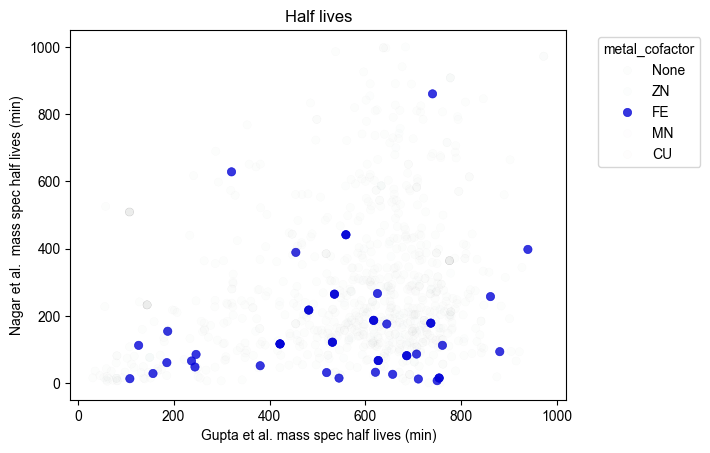

In [110]:
g = sns.scatterplot(x=df_plot['half_life_(min)_CL_Gupta_NE'], y = df_plot['half_life_(min)_CL_Nagar_NE'], 
                hue = df_plot['metal_cofactor'],
                palette = metal_color2,
                edgecolor = None)
g.set_title('Half lives')
g.set_xlabel('Gupta et al. mass spec half lives (min)')
g.set_ylabel('Nagar et al.  mass spec half lives (min)')
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1))

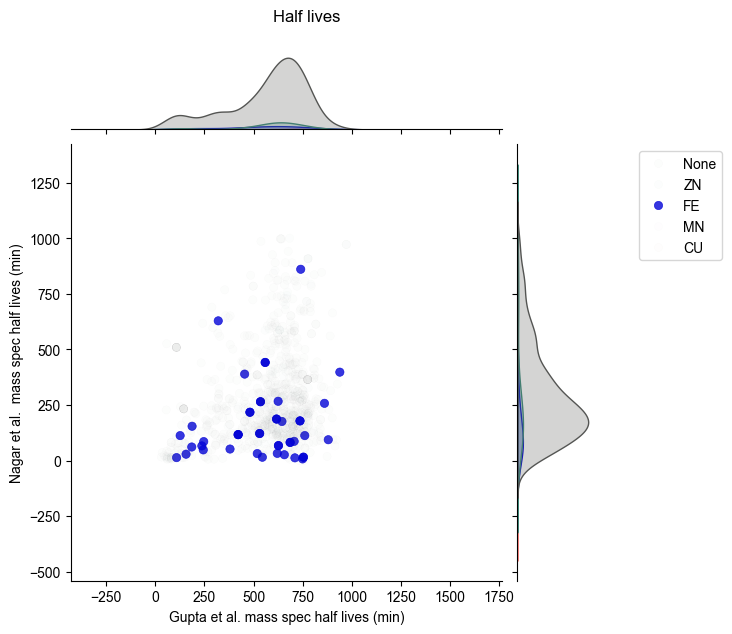

In [112]:
f = sns.jointplot(x=df_plot['half_life_(min)_CL_Gupta_NE'], y = df_plot['half_life_(min)_CL_Nagar_NE'], 
                hue = df_plot['metal_cofactor'],
                palette = metal_color2,
                edgecolor = None)
f.fig.suptitle('Half lives', y=1.05)
f.set_axis_labels('Gupta et al. mass spec half lives (min)','Nagar et al.  mass spec half lives (min)')
plt.legend(loc='upper left', bbox_to_anchor=(1.3, 1))